
### Titanic Dataset: Train decision tree, forests of randomized trees and Boosting

##### In this exercise, I have tried several models to predict the survivors in the tragic Titanic incident.

In [1]:
## Import all the relevant libraries
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
## Set the directory
%cd /Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/Day 3/Assignment/Data/Titanic

/Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/Day 3/Assignment/Data/Titanic


#### Data preparation

In this section:

1. I have tokenized the nominal variables
2. Combined the variables where relevant
3. Dealt with null values
4. Split the data into test and train datasets

In [3]:
## Import the data 
train = pd.read_csv('train.csv')

In [4]:
## Tokenize the nominal variables
## Ticket is not a useful variable so not going to tokenize it

cols = np.array(['Sex','Cabin','Embarked'])
for colname in cols[0:]:
    dt = train[colname].dtypes
    if dt not in [np.float64, np.int64]:
        train[colname] = pd.factorize(train[colname])[0]


In [5]:
## Data preparation

# 1. Ticket number and name don't provide much information for the modeling exercise. So going to discard them.

X = train[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']].copy()
y = train['Survived'].copy()

# 2. SibSp and Parch are similar variables and they can be combined to provide size of the family

X['FamilySize'] = X['SibSp']+X['Parch']
X = X.drop(['SibSp','Parch'],axis=1)


In [6]:
# Check the number of null in each column
X.isnull().sum()


Pclass          0
Sex             0
Age           177
Fare            0
Cabin           0
Embarked        0
FamilySize      0
dtype: int64

In [7]:
# Since Age column has a large number of NaNs, it might not be a good idea to discard those observations
# Replacing NaNs with -1 and NOT 0 to avoid confusion with infants who are younger than 1 year
X['Age'] = X['Age'].fillna(-1)

In [8]:
## Normalization code - use it if needed

# X_temp = X[['Age','FamilySize','Fare']]
# X[['Age','FamilySize','Fare']] = ((X_temp - X_temp.mean()) / X_temp.std())

In [9]:
# Split the data into test and train
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)

### Select Best Features

In this section, I have selected the best features using SelectKBest function. And plotted the histogram for the selected features.

The selected features are: 'Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked'

In [10]:
# Select best features

fs=SelectKBest(score_func=f_classif,k=5)
X_new=fs.fit_transform(train_X,train_y)
df = pd.DataFrame(zip(fs.get_support(),train_X.columns))
print 'Selected features:'
print list(df[df[0]==1][1])

Selected features:
['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']


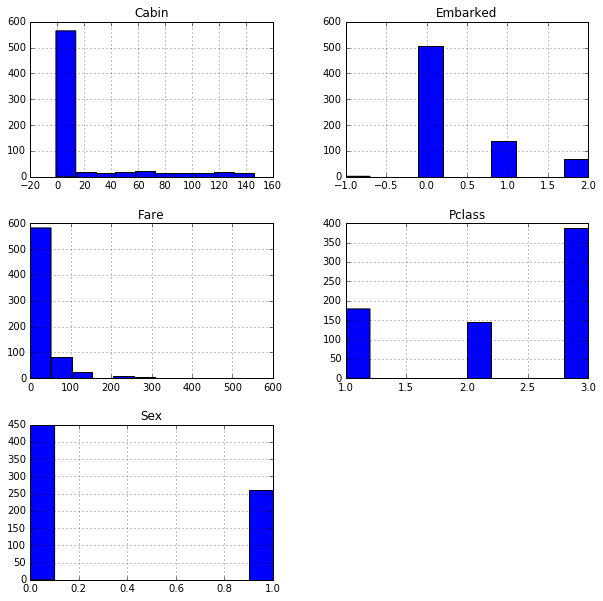

In [11]:
## Plot histograms of selected features
train_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']].hist(figsize=(10,10));

## Tried different models

In this section, I have played with several models and achieved varied results. The list below shows the classifiers and corresponding accuracy achieved. Of all the different classifiers that I tried, Decision Tree classifier seems to provide the best results

1. Decision Tree Classifier: Accuracy - 86.59%
2. Random Forest Classifier: Accuracy - 83.24%
3. Gradient Boosting Classifier: Accuracy - 84.36%
4. Ada Boost Classifier: Accuracy - 83.8%

### 1. Decision Tree Classifier

First, we are going to see how each of the parameter modifies the performance of the model by plotting them 

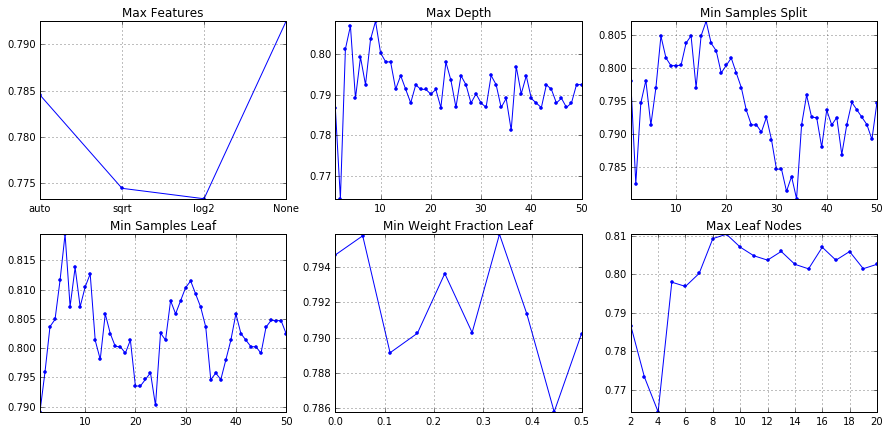

In [12]:
# Plot all the parameter variation for Decision tree classifier

plt.figure(figsize=(15,7))

#Max Features
plt.subplot(2,3,1)
feature_param = ['auto','sqrt','log2',None]
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(max_features=feature)
    clf.fit(train_X,train_y)
    scoreCV = cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('Max Features')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

#Max Depth
plt.subplot(2,3,2)
feature_param = range(1,51)
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(max_depth=feature)
    clf.fit(train_X,train_y)
    scoreCV = cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Depth')
plt.grid();

#Min Samples Split
plt.subplot(2,3,3)
feature_param = range(1,51)
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(min_samples_split =feature)
    clf.fit(train_X,train_y)
    scoreCV = cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Samples Split')
plt.grid();

#Min Samples Leaf
plt.subplot(2,3,4)
feature_param = range(1,51)
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(min_samples_leaf =feature)
    clf.fit(train_X,train_y)
    scoreCV = cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Samples Leaf')
plt.grid();

#Min Weight Fraction Leaf
plt.subplot(2,3,5)
feature_param = np.linspace(0,0.5,10)
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(min_weight_fraction_leaf =feature)
    clf.fit(train_X,train_y)
    scoreCV = cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Weight Fraction Leaf')
plt.grid();

#Max Leaf Nodes
plt.subplot(2,3,6)
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(max_leaf_nodes=feature)
    clf.fit(train_X,train_y)
    scoreCV = cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Leaf Nodes')
plt.grid();




In [13]:
## Use grid search for decision tree classifier to find the optimal values for the parameters

clf = DecisionTreeClassifier()

# n_neighbor = range(1,21)
param_grid = { 
    'max_features': ['auto','sqrt','log2',None],
    'max_depth': range(1,10),
    'min_samples_split': range(4,8),
    'min_samples_leaf': range(4,8),
    'min_weight_fraction_leaf': np.linspace(0,0.5,10),
    'max_leaf_nodes':range(6,10)    
}

## Use gridsearch and 10 fold cross validation on the train data set
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
return_val = grid.fit( train_X, train_y )
print 'Best score obtained using grid search:',(grid.best_score_)
print 'Best parameter obtained using grid search:',return_val.best_params_
gridscores = return_val.grid_scores_


Best score obtained using grid search: 0.806179775281
Best parameter obtained using grid search: {'max_leaf_nodes': 7, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.5, 'max_features': 'log2', 'max_depth': 8}


In [14]:
# Fit DecisionTreeClassifier

## Although grid search resulted in an optimal result, using those parameter values resulted in lower score. 
## The following combination of the parameters provides the best results: max_depth = 8,random_state=0

clf = DecisionTreeClassifier(max_depth = 8,random_state=0)
print 'Score =',(cross_val_score(clf, train_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']], train_y, cv=10)).mean()

clf = clf.fit(train_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']], train_y)
predicted = clf.predict(test_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']])

check = pd.DataFrame(zip(test_y,predicted))
check['new']=(check[0]-check[1])

print 'Error rate =', round(check[check['new']<>0]['new'].count()*100.0/check['new'].count(),2),'%'

Score = 0.796244131455
Error rate = 13.97 %


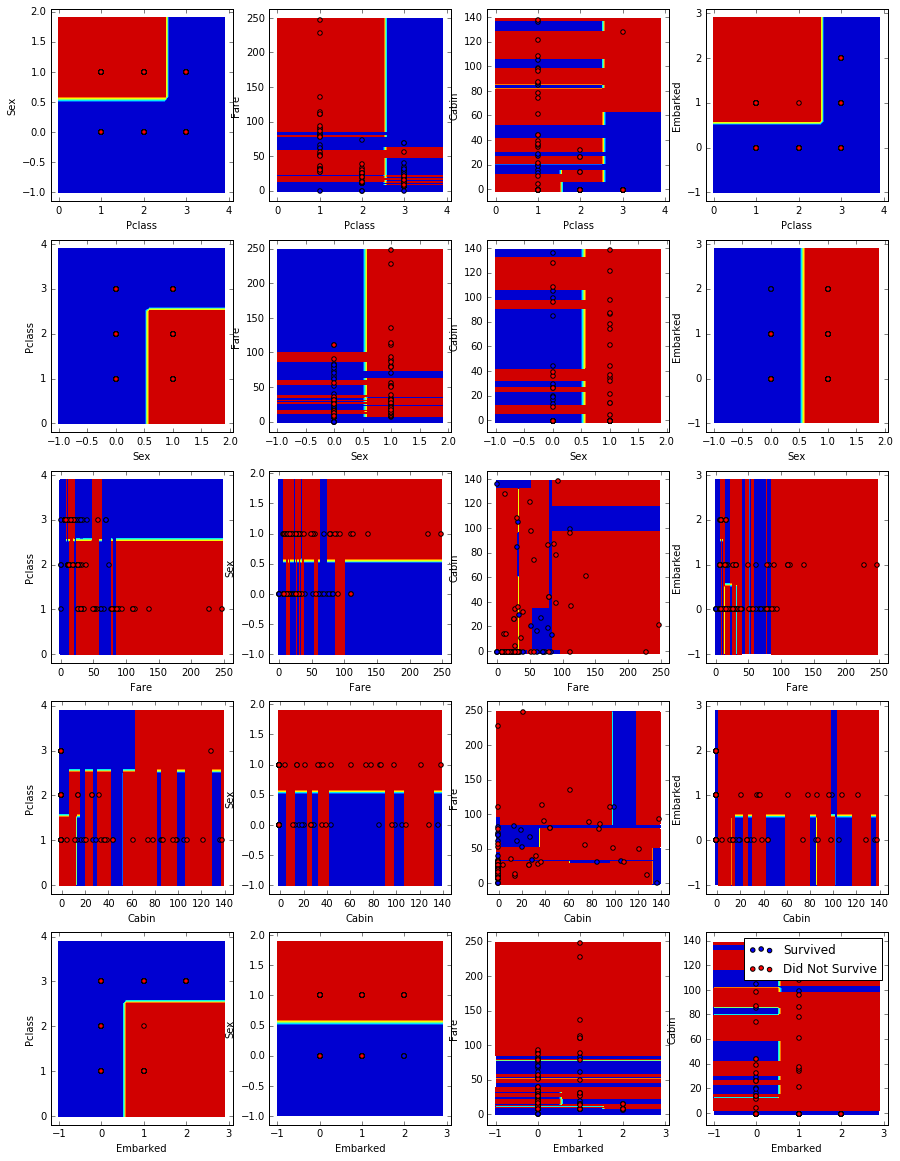

In [15]:
# Plot decision surface

n_classes = 2
Classes=['Survived','Did Not Survive']
plot_colors = "br"
plot_step = 0.1

def PlotDecisionSurface(features,clf):
    plt.figure(figsize=(15,20))
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[0,4],
                                    [1, 0], [1, 2], [1, 3],[1,4],
                                    [2, 0], [2, 1], [2, 3],[2,4],
                                    [3, 0], [3, 1], [3, 2],[3,4],
                                    [4, 0], [4, 1], [4, 2],[4,3],
                                   ]):
        
        F1=features[pair[0]]
        F2=features[pair[1]]
        
        X=test_X[[F1,F2]].values
        Y=test_y.values
    
        clf.fit(X,Y)
        
        # Plot the decision boundary
        plt.subplot(5, 4, pairidx + 1)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z)


        plt.xlabel(F1)
        plt.ylabel(F2)
        

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(Y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=Classes[i],cmap=plt.cm.Paired)

    plt.legend()
    plt.show()

features=['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']
clf = DecisionTreeClassifier()
PlotDecisionSurface(features,clf)
plt.suptitle("Decision surface of a decision tree using paired features")

### 2. Random forest classifier

A similar approach that was taken with Decision tree classifier has been followed here.

1. Plotted the variation of all the parameters
2. Found the variables that provide the best result
3. Plotted the decision surfaces

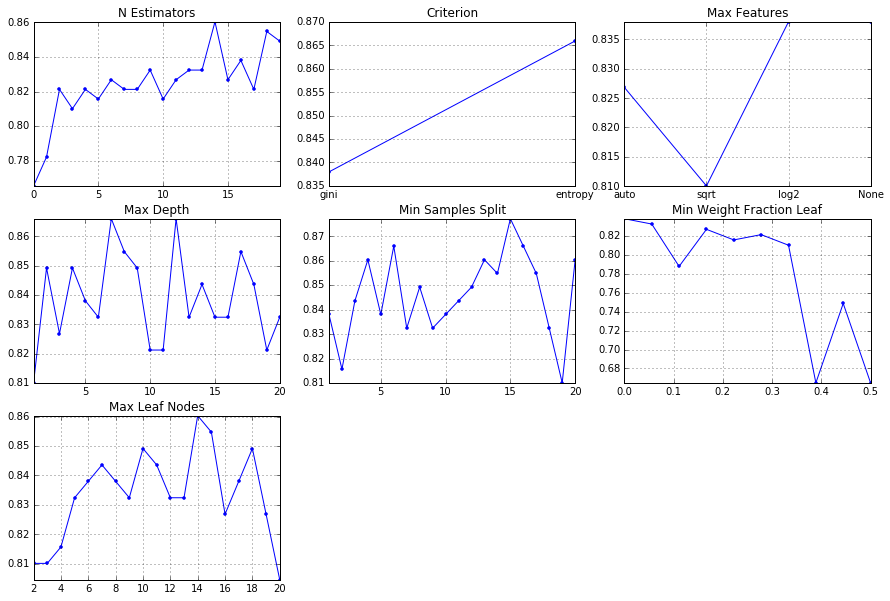

In [16]:
# Plot all the parameter variation for Random forest classifier

plt.figure(figsize=(15,10))

#N Estimators
plt.subplot(3,3,1)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(n_estimators=feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('N Estimators')
plt.grid();

#Criterion
plt.subplot(3,3,2)
feature_param = ['gini','entropy']
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(criterion=feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.title('Criterion')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

#Max Features
plt.subplot(3,3,3)
feature_param = ['auto','sqrt','log2',None]
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_features=feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('Max Features')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

#Max Depth
plt.subplot(3,3,4)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_depth=feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Depth')
plt.grid();

#Min Samples Split
plt.subplot(3,3,5)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(min_samples_split =feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Samples Split')
plt.grid();

#Min Weight Fraction Leaf
plt.subplot(3,3,6)
feature_param = np.linspace(0,0.5,10)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(min_weight_fraction_leaf =feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Weight Fraction Leaf')
plt.grid();

#Max Leaf Nodes
plt.subplot(3,3,7)
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_leaf_nodes=feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Leaf Nodes')
plt.grid();

In [17]:
# Fit Random forest Classifier

clf = RandomForestClassifier(n_estimators=4,max_depth = 3,min_samples_split=18, random_state=0) 
print 'Score =',(cross_val_score(clf, train_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']], train_y, cv=10)).mean()

clf = clf.fit(train_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']], train_y)
predicted = clf.predict(test_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']])

check = pd.DataFrame(zip(test_y,predicted))
check['new']=(check[0]-check[1])

print 'Error rate =', round(check[check['new']<>0]['new'].count()*100.0/check['new'].count(),2),'%'



Score = 0.810367762128
Error rate = 16.76 %


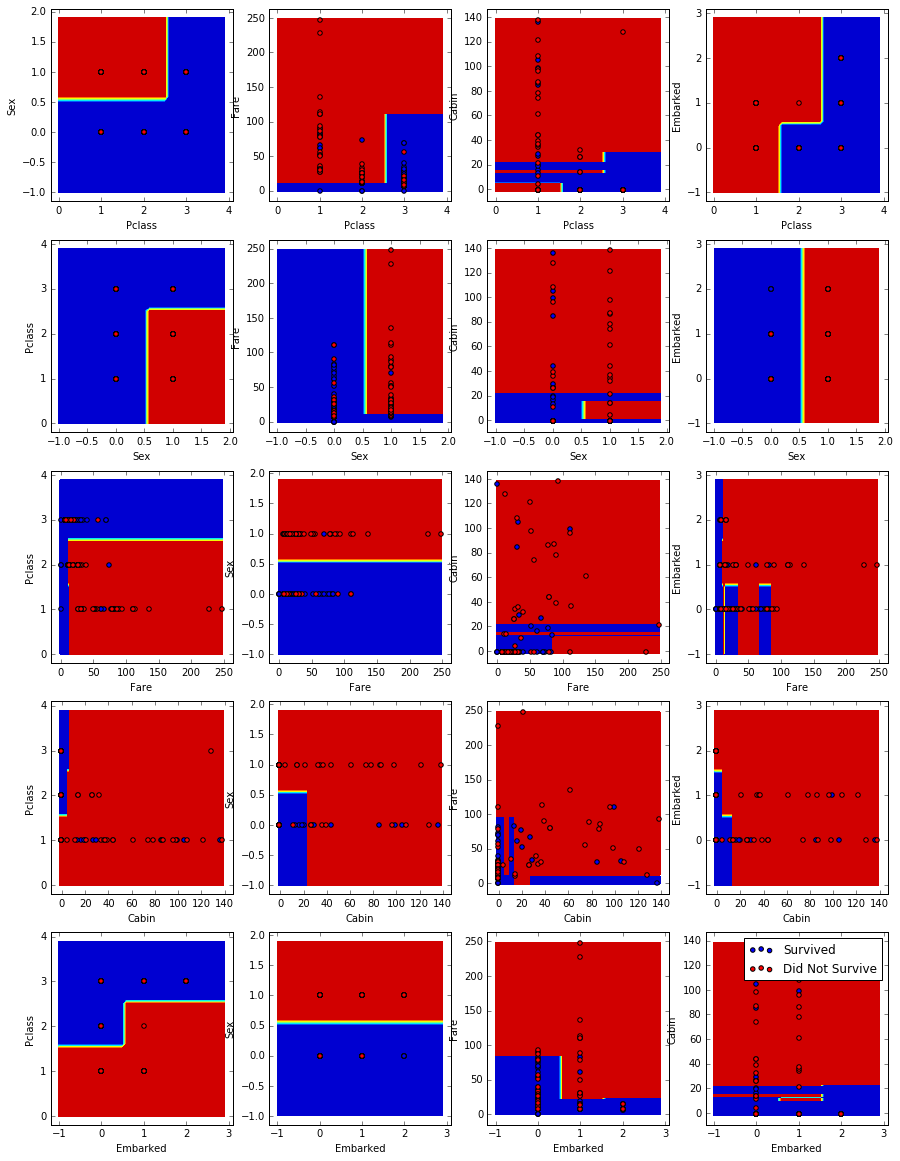

In [18]:
# Plot decision surface

n_classes = 2
Classes=['Survived','Did Not Survive']
plot_colors = "br"
plot_step = 0.1

def PlotDecisionSurface(features,clf):
    plt.figure(figsize=(15,20))
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[0,4],
                                    [1, 0], [1, 2], [1, 3],[1,4],
                                    [2, 0], [2, 1], [2, 3],[2,4],
                                    [3, 0], [3, 1], [3, 2],[3,4],
                                    [4, 0], [4, 1], [4, 2],[4,3],
                                   ]):
        
        F1=features[pair[0]]
        F2=features[pair[1]]
        
        X=test_X[[F1,F2]].values
        Y=test_y.values
    
        clf.fit(X,Y)
        
        # Plot the decision boundary
        plt.subplot(5, 4, pairidx + 1)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z)


        plt.xlabel(F1)
        plt.ylabel(F2)
        

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(Y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=Classes[i],cmap=plt.cm.Paired)

    plt.legend()
    plt.show()

features=['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']
clf = RandomForestClassifier(n_estimators=4,max_depth = 3,min_samples_split=18, random_state=0)
PlotDecisionSurface(features,clf)
plt.suptitle("Decision surface of a decision tree using paired features")

### 3. Gradient Boosting Classifier

A similar approach that was taken with Decision tree classifier has been followed here.

1. Plotted the variation of all the parameters
2. Found the variables that provide the best result
3. Plotted the decision surfaces

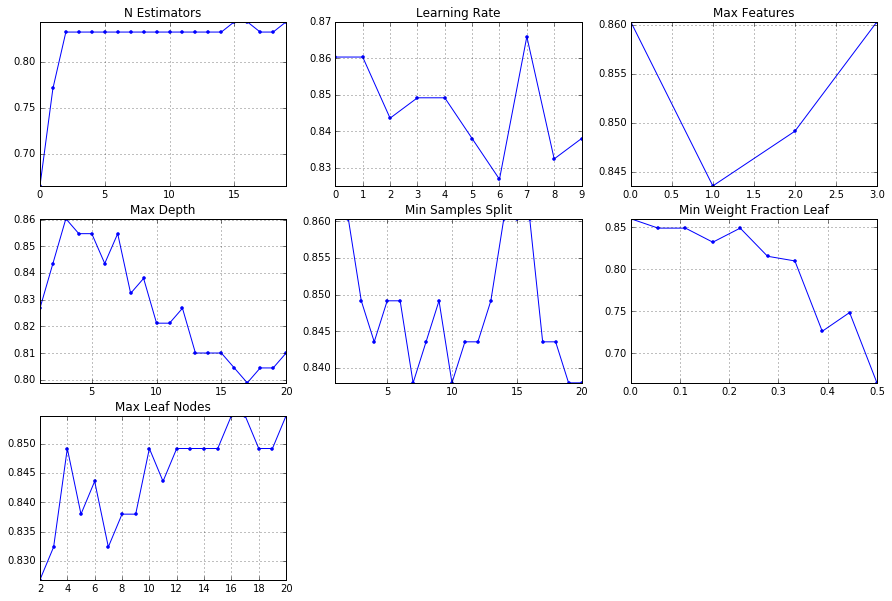

In [19]:
# Plot all the parameter variation for Gradient boosting classifier
plt.figure(figsize=(15,10))

#N Estimators
plt.subplot(3,3,1)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(n_estimators=feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('N Estimators')
plt.grid();

#Learning Rate
plt.subplot(3,3,2)
feature_param = np.linspace(0.1,1,10)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(learning_rate=feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.title('Learning Rate')
plt.grid();

#Max Features
plt.subplot(3,3,3)
feature_param = ['auto','sqrt','log2',None]
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(max_features=feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('Max Features')
plt.grid();

#Max Depth
plt.subplot(3,3,4)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(max_depth=feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Depth')
plt.grid();

#Min Samples Split
plt.subplot(3,3,5)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(min_samples_split =feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Samples Split')
plt.grid();

#Min Weight Fraction Leaf
plt.subplot(3,3,6)
feature_param = np.linspace(0,0.5,10)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(min_weight_fraction_leaf =feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Weight Fraction Leaf')
plt.grid();

#Max Leaf Nodes
plt.subplot(3,3,7)
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    clf = GradientBoostingClassifier(max_leaf_nodes=feature)
    clf.fit(train_X,train_y)
    scoreCV = clf.score(test_X,test_y)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Leaf Nodes')
plt.grid();

In [20]:
# Fit GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100,max_depth = 2) 
print 'Score =',(cross_val_score(clf, train_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']], train_y, cv=10)).mean()

clf = clf.fit(train_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']], train_y)
predicted = clf.predict(test_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']])

check = pd.DataFrame(zip(test_y,predicted))
check['new']=(check[0]-check[1])

print 'Error rate =', round(check[check['new']<>0]['new'].count()*100.0/check['new'].count(),2),'%'

Score = 0.80608372457
Error rate = 15.64 %


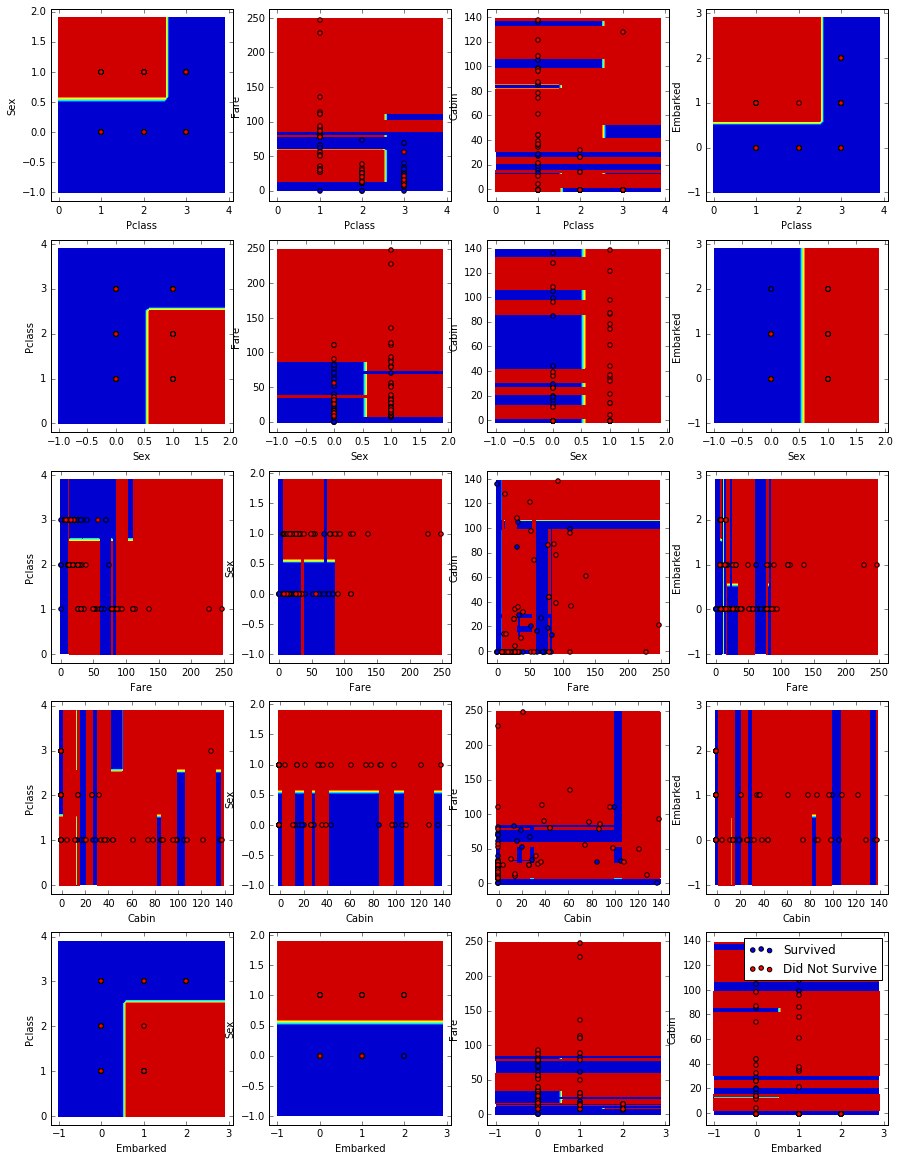

In [21]:
# Plot decision surface

n_classes = 2
Classes=['Survived','Did Not Survive']
plot_colors = "br"
plot_step = 0.1

def PlotDecisionSurface(features,clf):
    plt.figure(figsize=(15,20))
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[0,4],
                                    [1, 0], [1, 2], [1, 3],[1,4],
                                    [2, 0], [2, 1], [2, 3],[2,4],
                                    [3, 0], [3, 1], [3, 2],[3,4],
                                    [4, 0], [4, 1], [4, 2],[4,3],
                                   ]):
        
        F1=features[pair[0]]
        F2=features[pair[1]]
        
        X=test_X[[F1,F2]].values
        Y=test_y.values
    
        clf.fit(X,Y)
        
        # Plot the decision boundary
        plt.subplot(5, 4, pairidx + 1)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z)


        plt.xlabel(F1)
        plt.ylabel(F2)
        

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(Y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=Classes[i],cmap=plt.cm.Paired)

    plt.legend()
    plt.show()

features=['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']
clf = GradientBoostingClassifier(n_estimators=100,max_depth = 2) 
PlotDecisionSurface(features,clf)
plt.suptitle("Decision surface of a decision tree using paired features")

### 4. Ada Boost Classifier

In [22]:
clf = AdaBoostClassifier(n_estimators=12) 
print 'Score =', (cross_val_score(clf, train_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']], train_y, cv=10)).mean()

clf = clf.fit(train_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']], train_y)
predicted = clf.predict(test_X[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']])

check = pd.DataFrame(zip(test_y,predicted))
check['new']=(check[0]-check[1])

print 'Error rate =', round(check[check['new']<>0]['new'].count()*100.0/check['new'].count(),2),'%'

Score = 0.783646322379
Error rate = 16.2 %


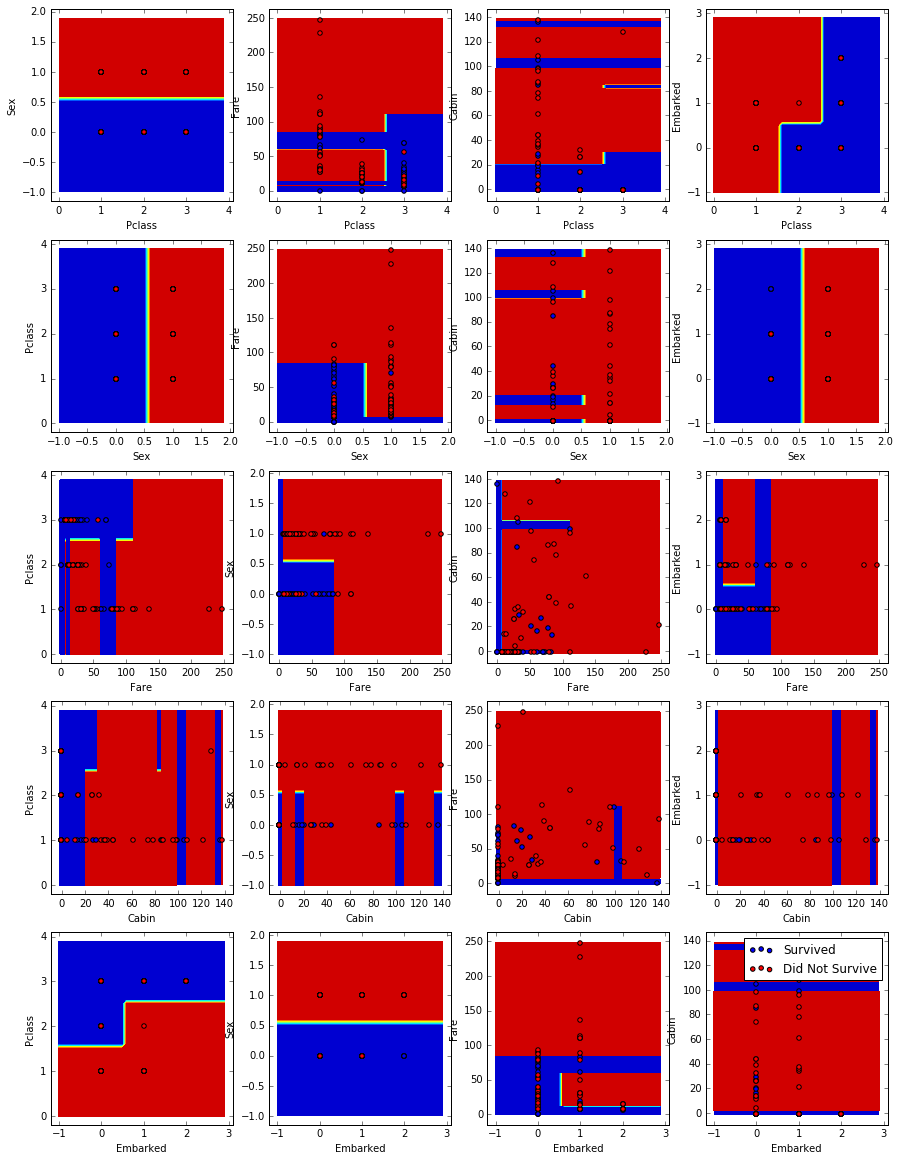

In [23]:
# Plot decision surface

n_classes = 2
Classes=['Survived','Did Not Survive']
plot_colors = "br"
plot_step = 0.1

def PlotDecisionSurface(features,clf):
    plt.figure(figsize=(15,20))
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[0,4],
                                    [1, 0], [1, 2], [1, 3],[1,4],
                                    [2, 0], [2, 1], [2, 3],[2,4],
                                    [3, 0], [3, 1], [3, 2],[3,4],
                                    [4, 0], [4, 1], [4, 2],[4,3],
                                   ]):
        
        F1=features[pair[0]]
        F2=features[pair[1]]
        
        X=test_X[[F1,F2]].values
        Y=test_y.values
    
        clf.fit(X,Y)
        
        # Plot the decision boundary
        plt.subplot(5, 4, pairidx + 1)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z)


        plt.xlabel(F1)
        plt.ylabel(F2)
        

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(Y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=Classes[i],cmap=plt.cm.Paired)

    plt.legend()
    plt.show()

features=['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']
clf = AdaBoostClassifier(n_estimators=12) 
PlotDecisionSurface(features,clf)
plt.suptitle("Decision surface of a decision tree using paired features")